In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression


In [2]:
columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv("processed.cleveland.data",
                 names=columns, na_values="?")
df = df.dropna()
X = df.drop("target", axis=1)
y = df["target"]

In [3]:
# 1. Feature Importance - Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X,y)
importance = random_forest.feature_importances_
features_random_forest = pd.DataFrame({"Feature": X.columns, "Importance": importance})
features_rf = features_random_forest.sort_values(by="Importance", ascending=False)
print("\nFeature Importance (Random Forest):")
print(features_random_forest)


Feature Importance (Random Forest):
     Feature  Importance
0        age    0.114679
1        sex    0.028470
2         cp    0.074893
3   trestbps    0.091944
4       chol    0.118272
5        fbs    0.018859
6    restecg    0.027919
7    thalach    0.138011
8      exang    0.046702
9    oldpeak    0.119765
10     slope    0.045902
11        ca    0.097221
12      thal    0.077363


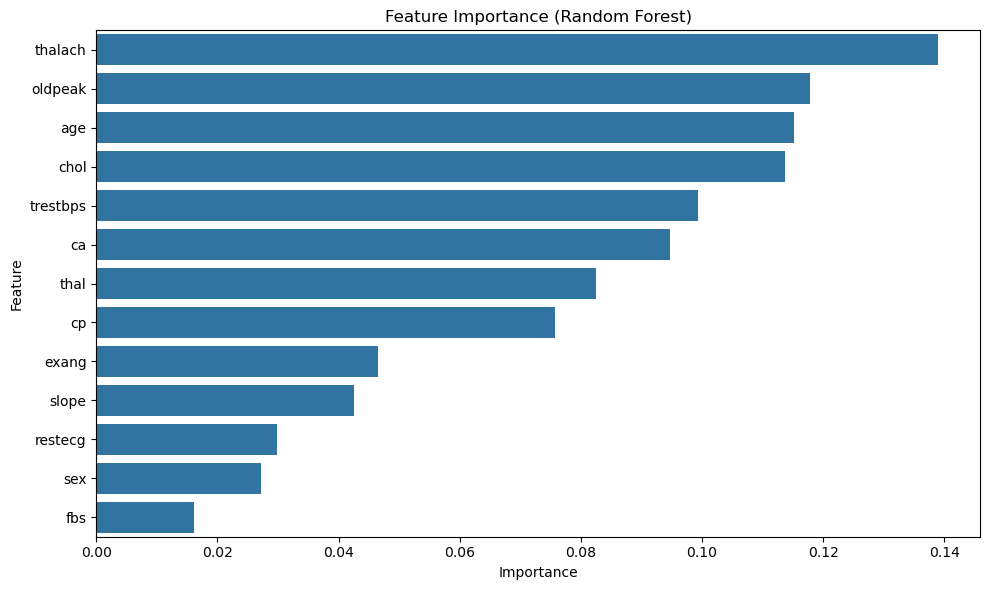

In [5]:
# 2. Feature Importance - Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance_rf.png")
plt.show()

In [7]:
# 2. Recursive Feature Elimination (RFE) - Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=logistic_regression, n_features_to_select=5)
rfe.fit(X, y)

features_rfe = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
})
rfe_features = X.columns[rfe.support_].tolist()

print("\nRecursive Feature Elimination (RFE):")
print(features_rfe)

c:\Users\EELU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\EELU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 


Recursive Feature Elimination (RFE):
     Feature  Selected  Ranking
0        age     False        6
1        sex      True        1
2         cp     False        2
3   trestbps     False        8
4       chol     False        9
5        fbs      True        1
6    restecg     False        4
7    thalach     False        7
8      exang      True        1
9    oldpeak     False        3
10     slope      True        1
11        ca      True        1
12      thal     False        5


In [ ]:
# 3. Chi-Square Test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=5)
chi2_selector.fit(X_scaled, y)

features_chi2 = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi2_selector.scores_
}).sort_values(by="Chi2 Score", ascending=False)


print("\nChi-Square Test:")
print(features_chi2)


Chi-Square Test:
     Feature  Chi2 Score
12      thal   48.191147
8      exang   39.119182
11        ca   35.737851
9    oldpeak   15.887988
10     slope   13.533319
2         cp    7.991380
1        sex    7.511646
5        fbs    6.778461
6    restecg    6.513217
7    thalach    3.194716
0        age    1.244537
3   trestbps    0.637719
4       chol    0.177620


In [11]:
# Union 
final_features_union = list(set(
    importance_df.head(5)["Feature"].tolist() +
    rfe_features + features_chi2.head(5)["Feature"].tolist()     
))

print("\n🎯 Final Selected Features (Union):")
print(final_features_union)

# Intersection 
final_features_intersection = list(
    set(importance_df.head(5)["Feature"].tolist()) &
    set(rfe_features) &
    set(features_chi2.head(5)["Feature"].tolist())
)

print("\n✅ Final Selected Features (Intersection):")
print(final_features_intersection)



🎯 Final Selected Features (Union):
['exang', 'slope', 'trestbps', 'oldpeak', 'ca', 'sex', 'chol', 'age', 'fbs', 'thal', 'thalach']

✅ Final Selected Features (Intersection):
[]
